## Stock Market Data And Analysis

We have apple stock data from 2006 - 2017 and we will perform financial analysis.


1) First step is to import data from Excel file to Jupyter NoteBook.


2) After importing the data we will visually see the stock price behaviour.


3) In the next step we will find the price difference which will help us in the calcualtion of daily returns.


4) Now, we will find daily return which means the change in stock price as a percentge of closing price.


5) The next step is to find direction which is determined by price difference.

6) We will find moving average, as we know the fluctuations are common in stock price. Moving average helps to smooth out the noise.

7) Now, we will build a simple strategy of stock trading.


8) The next step to to find profit. As we know the profit can be positive or negative. 

9) The last step is to compute the cumulative wealth using built-in function cumsum().

### 1) Importing Data

In [1]:
#import the packages "Pandas" and "MatPlotLib" into Jupyter Notebook
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import Apple's stock data
apple =  pd.read_csv('apple.csv')

In [3]:
# head() function used to get the first n rows
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700


In [4]:
# tail() function used to get the last n rows
apple.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2827,2017-12-22,174.679993,175.419998,174.500000,175.009995,174.299362,16349400
2828,2017-12-26,170.800003,171.470001,169.679993,170.570007,169.877396,33185500
2829,2017-12-27,170.100006,170.779999,169.710007,170.600006,169.907272,21498200
2830,2017-12-28,171.000000,171.850006,170.479996,171.080002,170.385315,16480200
2831,2017-12-29,170.520004,170.589996,169.220001,169.229996,168.542831,25999900


In [5]:
# selecting multiple column from dataframe
apple[['Open', 'Close']]

,Open,Close
0,10.728572,10.694285
1,10.635715,10.582857
2,10.585714,10.768572
3,10.647142,10.690000
4,10.631429,10.602858
...,...,...
2827,174.679993,175.009995
2828,170.800003,170.570007
2829,170.100006,170.600006
2830,171.000000,171.080002


In [6]:
# dimension of dataframe in rows and column
print(apple.shape)

(2832, 7)


In [7]:
# describe generate descriptive statistics
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2.832000e+03
mean,68.320872,68.933320,67.649567,68.311338,58.889247,1.247076e+08
std,43.575515,43.848188,43.295483,43.585431,45.162888,9.902702e+07
min,10.488571,10.568571,10.371428,10.461429,7.081933,1.147590e+07
25%,26.483928,26.698572,26.018215,26.435715,17.895826,5.039560e+07
50%,63.119999,64.015716,62.493572,63.212858,47.810322,9.986585e+07
75%,101.552500,102.372501,100.632500,101.592501,96.878050,1.672990e+08
max,175.110001,177.199997,174.860001,176.419998,175.703629,8.432424e+08


### 2) Visualizing Stock Price

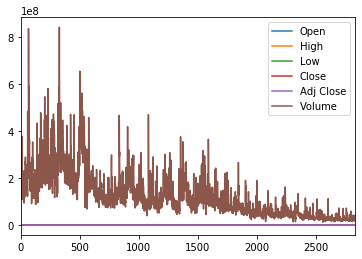

In [8]:
apple.plot()
plt.show()

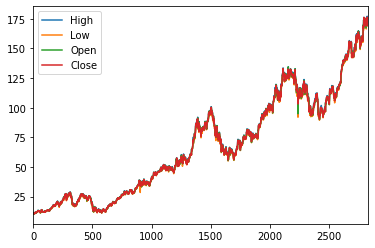

In [9]:
apple[['High','Low', 'Open', 'Close']].plot()
plt.show()

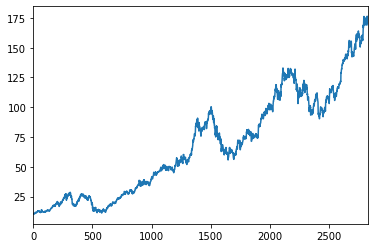

In [10]:
apple['Close'].plot()
plt.show()

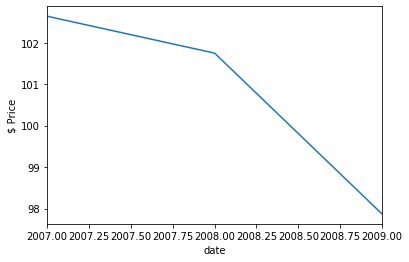

In [11]:
apple.loc['2006-10-02':'2009-12-29', 'Close'].plot() 
plt.xlabel("date")
plt.ylabel("$ Price")
plt.show()

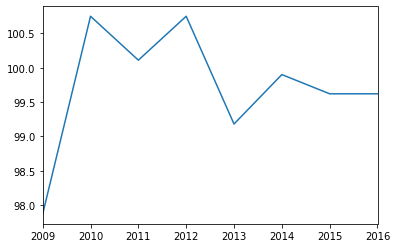

In [12]:
apple.loc['2008-01-02':'2016-12-31', 'Close'].plot() #2016
plt.show()

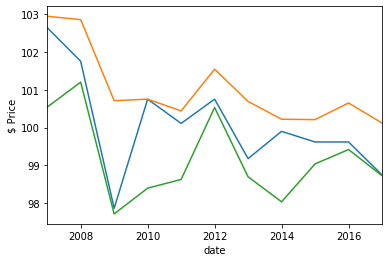

In [13]:
apple.loc['2006-10-02':'2017-12-29', 'Close'].plot() 
apple.loc['2006-10-02':'2017-12-29', 'High'].plot() 
apple.loc['2006-10-02':'2017-12-29', 'Low'].plot() 
plt.xlabel("date")
plt.ylabel("$ Price")
plt.show()

### 3) Price Difference

In [14]:
#Create a new column PriceDiff in the DataFrame apple
apple['PriceDiff'] = apple['Close'].shift(-1) - apple['Close']

In [15]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.111428
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.185715
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.078572
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.087142
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.058570


### 4) Daily Return

 Daily return means the change in stock price as a percentge of closing price of today.
 
 
 Daily Return = Price Difference/ Close Price of today

In [16]:
#Create a new column Return in the DataFrame apple
apple['Daily Return'] =apple['PriceDiff'] /apple['Close']

In [17]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Daily Return
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.111428,-0.010419
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.185715,0.017549
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.078572,-0.007296
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.087142,-0.008152
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.058570,0.005524


### 5) Direction

The direction is determined by price difference. If price difference is positive, the direction is up and denoted as one. Otherwise, it's down and denoted as negative one.


If the price difference is larger than 0, denote as 1, otherwise, denote as 0

In [18]:
 # The condition says we will get value 1 for direction if price differenc is positive otherwise it is negative
apple['Direction'] = [1 if apple['PriceDiff'].loc[ei] > 0 else 0 for ei in apple.index ]

In [19]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Daily Return,Direction
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.111428,-0.010419,0
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.185715,0.017549,1
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.078572,-0.007296,0
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.087142,-0.008152,0
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.058570,0.005524,1


### 6.1) Moving Average Calculation

Random fluctuations are very common in stock price and taking an average price in a period can smooth out the noise. We will have NAN at top 2 rows which means not a number.

In [20]:
apple['Average'] = (apple['Close'] + (apple['Close']).shift(1)
                + (apple['Close']).shift(2))/3

shift(1) means to shift the whole column downwards by 1 row. Similarly shift(2) means to shift the whole column downwards by 2 rows.

In [21]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Daily Return,Direction,Average
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.111428,-0.010419,0,NaN
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.185715,0.017549,1,NaN
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.078572,-0.007296,0,10.681905
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.087142,-0.008152,0,10.680476
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.058570,0.005524,1,10.687143


### 6.2) Moving Average using rolling()

Rolling is a very nice method to provide us rolling window calculation. We can use this rolling window to calculate mean even sum.

Moving Average of short period (Fast Signal) is more closely associated with recent change of stock price. Moving Average over long period (slow signal) reflects the price change over long-term history. 


MA3-> short period-> fast signal

MA200-> long period-> slow signal

In [22]:
apple['ma3'] = apple['Close'].rolling(3).mean()

In [23]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Daily Return,Direction,Average,ma3
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.111428,-0.010419,0,NaN,NaN
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.185715,0.017549,1,NaN,NaN
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.078572,-0.007296,0,10.681905,10.681905
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.087142,-0.008152,0,10.680476,10.680476
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.058570,0.005524,1,10.687143,10.687143


We can plot these moving averages and compare them with Close price. We first plot Close price then moving average 3 and finally, moving average 200.

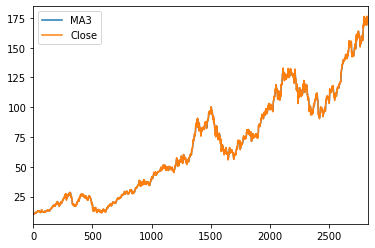

In [24]:
#plot the moving average
apple['ma3'].plot(label='MA3')
apple['Close'].plot(label='Close')
plt.legend()
plt.show()

In [25]:
apple['ma200'] = apple['Close'].rolling(200).mean()
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Daily Return,Direction,Average,ma3,ma200
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.111428,-0.010419,0,NaN,NaN,NaN
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.185715,0.017549,1,NaN,NaN,NaN
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.078572,-0.007296,0,10.681905,10.681905,NaN
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.087142,-0.008152,0,10.680476,10.680476,NaN
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.058570,0.005524,1,10.687143,10.687143,NaN


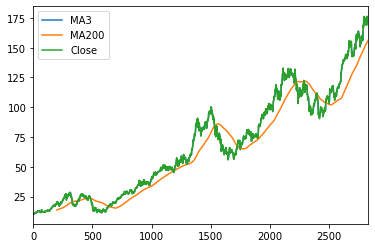

In [26]:
apple['ma3'].plot(label='MA3')
apple['ma200'].plot(label='MA200')
apple['Close'].plot(label='Close')
plt.legend()
plt.show()

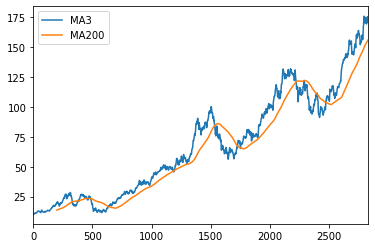

In [27]:
apple['ma3'].plot(label='MA3')
apple['ma200'].plot(label='MA200')
plt.legend()
plt.show()

### 7) Trading Strategy

If MA3>MA200 ->stock price goes up in the next several days. Otherwise, the price will decrease.

Our strategy is, if MA3 > MA200, we will buy and hold one share of stock, which means we will long one share of stock. This yellow area labels the days on which we buy and hold one share of stock.


In [28]:
# Shares is equal to 1 if MA3 is larger than MA200, otherwise it is zero. 
apple['Shares'] = [1 if apple.loc[ei, 'ma3'] > apple.loc[ei, 'ma200'] else 0
               for ei in apple.index]

In [29]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Daily Return,Direction,Average,ma3,ma200,Shares
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.111428,-0.010419,0,NaN,NaN,NaN,0
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.185715,0.017549,1,NaN,NaN,NaN,0
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.078572,-0.007296,0,10.681905,10.681905,NaN,0
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.087142,-0.008152,0,10.680476,10.680476,NaN,0
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.058570,0.005524,1,10.687143,10.687143,NaN,0


### 8) Daily Profit

First, we create variable Close1, which is the close price of tomorrow. Then, we'll create a new variable called Profit, which indeed is the daily profit. If shares is equal to one, the daily profit is equal to the close price of tomorrow minus close price of today. It can be positive or negative. If negative, we lose money on that day. If shares is equal to 0, it means we do not have stock at hand, the profit is equal to zero.

In [30]:
# close1 is the close price of tomorrow
apple['Close1'] = apple['Close'].shift(-1)

In [31]:
# PROFIT = close price of tomorrow minus close price of today
apple['Profit'] = [apple.loc[ei, 'Close1']-apple.loc[ei, 'Close']
                if apple.loc[ei, 'Shares'] == 1
                else 0 for ei in apple.index]

If shares is equal to one, the daily profit is equal to the close price of tomorrow minus close price of today.
If shares is equal to 0, it means we do not have stock at hand, the profit is equal to zero.

In [32]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Daily Return,Direction,Average,ma3,ma200,Shares,Close1,Profit
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.111428,-0.010419,0,NaN,NaN,NaN,0,10.582857,0.0
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.185715,0.017549,1,NaN,NaN,NaN,0,10.768572,0.0
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.078572,-0.007296,0,10.681905,10.681905,NaN,0,10.690000,0.0
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.087142,-0.008152,0,10.680476,10.680476,NaN,0,10.602858,0.0
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.058570,0.005524,1,10.687143,10.687143,NaN,0,10.661428,0.0


In [33]:
apple.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Daily Return,Direction,Average,ma3,ma200,Shares,Close1,Profit
2827,2017-12-22,174.679993,175.419998,174.500000,175.009995,174.299362,16349400,-4.439988,-0.025370,0,174.789999,174.789999,155.30330,1,170.570007,-4.439988
2828,2017-12-26,170.800003,171.470001,169.679993,170.570007,169.877396,33185500,0.029999,0.000176,1,173.529999,173.529999,155.46015,1,170.600006,0.029999
2829,2017-12-27,170.100006,170.779999,169.710007,170.600006,169.907272,21498200,0.479996,0.002814,1,172.060003,172.060003,155.61820,1,171.080002,0.479996
2830,2017-12-28,171.000000,171.850006,170.479996,171.080002,170.385315,16480200,-1.850006,-0.010814,0,170.750005,170.750005,155.77130,1,169.229996,-1.850006
2831,2017-12-29,170.520004,170.589996,169.220001,169.229996,168.542831,25999900,NaN,NaN,0,170.303335,170.303335,155.91400,1,NaN,NaN


 We can plot the profit and find out on some days we make money, on other days we lose money.

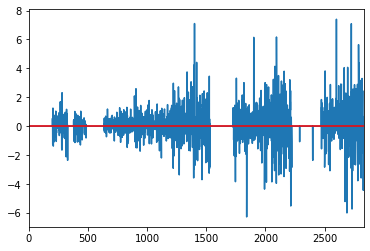

In [34]:
apple['Profit'].plot()
plt.axhline(y=0, color= 'red')

The positive value i.e. above zero -> we make money

The negative values i.e. below zero -> we lose money

### 9) Cumulative Wealth

We can compute the cumulative wealth. We use DataFrame method, Cumsum to compute cumulative sum and create a new variable Wealth.

In [35]:
apple['Wealth'] = apple['Profit'].cumsum()
apple.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Daily Return,Direction,Average,ma3,ma200,Shares,Close1,Profit,Wealth
2827,2017-12-22,174.679993,175.419998,174.500000,175.009995,174.299362,16349400,-4.439988,-0.025370,0,174.789999,174.789999,155.30330,1,170.570007,-4.439988,168.630019
2828,2017-12-26,170.800003,171.470001,169.679993,170.570007,169.877396,33185500,0.029999,0.000176,1,173.529999,173.529999,155.46015,1,170.600006,0.029999,168.660018
2829,2017-12-27,170.100006,170.779999,169.710007,170.600006,169.907272,21498200,0.479996,0.002814,1,172.060003,172.060003,155.61820,1,171.080002,0.479996,169.140014
2830,2017-12-28,171.000000,171.850006,170.479996,171.080002,170.385315,16480200,-1.850006,-0.010814,0,170.750005,170.750005,155.77130,1,169.229996,-1.850006,167.290008
2831,2017-12-29,170.520004,170.589996,169.220001,169.229996,168.542831,25999900,NaN,NaN,0,170.303335,170.303335,155.91400,1,NaN,NaN,NaN


In [36]:
print("Total money you win is", apple.loc[apple.index[-2], 'Wealth'])
print("Total money you spent is", apple.loc[apple.index[0], 'Close'])

Total money you win is 167.290008
Total money you spent is 10.694285


This strategy makes about $167. In the last row, the profit and the wealth have NaN values, because those returns are computed from Close1, and Close1 is calculated using shift(-1). So, to get a terminal wealth using loc, the index level should be fb.index[-2]. Then, we print out wealth, which in fact is a sum of profit. To realize this profit, we need to buy one share of stock initially. So, our initial investment is a stock price on the first day.

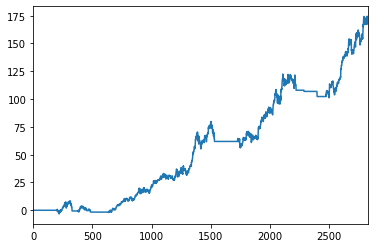

In [37]:
apple['Wealth'].plot()